In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
train = pd.read_csv('Train_aBjfeNk.csv')
test = pd.read_csv('Test_LqhgPWU.csv')
ss = pd.read_csv('sample_submission_wyi0h0z.csv')

In [3]:
print(train.shape)
train.head(10)

(8068, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [4]:
print(test.shape)
train.head(10)

(2627, 10)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [5]:
def nullColumns(train_data):
    list_of_nullcolumns =[]
    for column in train_data.columns:
        total= train_data[column].isna().sum()
        try:
            if total !=0:
                print('Total Na values is {0} for column {1}' .format(total, column))
                list_of_nullcolumns.append(column)
        except:
            print(column,"-----",total)
    print('\n')
    return list_of_nullcolumns


def percentMissingFeature(data):
    data_na = (data.isnull().sum() / len(data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    return data_na


def plotMissingFeature(data_na):
    f, ax = plt.subplots(figsize=(15, 12))
    plt.xticks(rotation='90')
    if(data_na.empty ==False):
        sns.barplot(x=data_na.index, y=data_na)
        plt.xlabel('Features', fontsize=15)
        plt.ylabel('Percent of missing values', fontsize=15)
        plt.title('Percent missing data by feature', fontsize=15)

In [6]:
print('train data')
print(nullColumns(train))
print(percentMissingFeature(train))
print('\n')
print('test_data')
print(nullColumns(test))
print(percentMissingFeature(test))

train data
Total Na values is 140 for column Ever_Married
Total Na values is 78 for column Graduated
Total Na values is 124 for column Profession
Total Na values is 829 for column Work_Experience
Total Na values is 335 for column Family_Size
Total Na values is 76 for column Var_1


['Ever_Married', 'Graduated', 'Profession', 'Work_Experience', 'Family_Size', 'Var_1']
Work_Experience    10.275161
Family_Size         4.152206
Ever_Married        1.735250
Profession          1.536936
Graduated           0.966782
Var_1               0.941993
dtype: float64


test_data
Total Na values is 50 for column Ever_Married
Total Na values is 24 for column Graduated
Total Na values is 38 for column Profession
Total Na values is 269 for column Work_Experience
Total Na values is 113 for column Family_Size
Total Na values is 32 for column Var_1


['Ever_Married', 'Graduated', 'Profession', 'Work_Experience', 'Family_Size', 'Var_1']
Work_Experience    10.239817
Family_Size         4.301485
Ever_Married  

Text(0.5, 1.0, 'Segments')

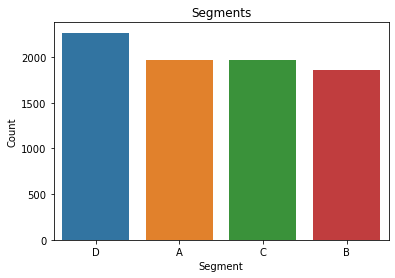

In [7]:
segments = train.loc[:,"Segmentation"].value_counts()
plt.xlabel("Segment")
plt.ylabel('Count')
sns.barplot(segments.index , segments.values).set_title('Segments')

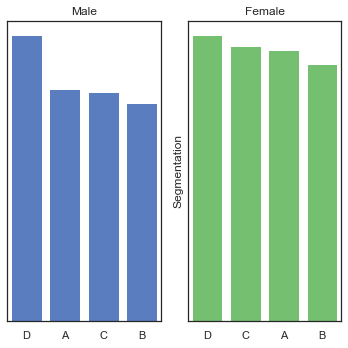

In [8]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 2, figsize=(5, 5))

segments_male = train.loc[train.Gender == 'Male', "Segmentation"].value_counts()
sns.barplot(segments_male.index, segments_male.values,
            color="b", ax=axes[0]).set_title('Male')

segments_female = train.loc[train.Gender == 'Female', "Segmentation"].value_counts()
sns.barplot(segments_female.index, segments_female, color="g", ax=axes[1]).set_title('Female')

plt.setp(axes, yticks=[])
plt.tight_layout()

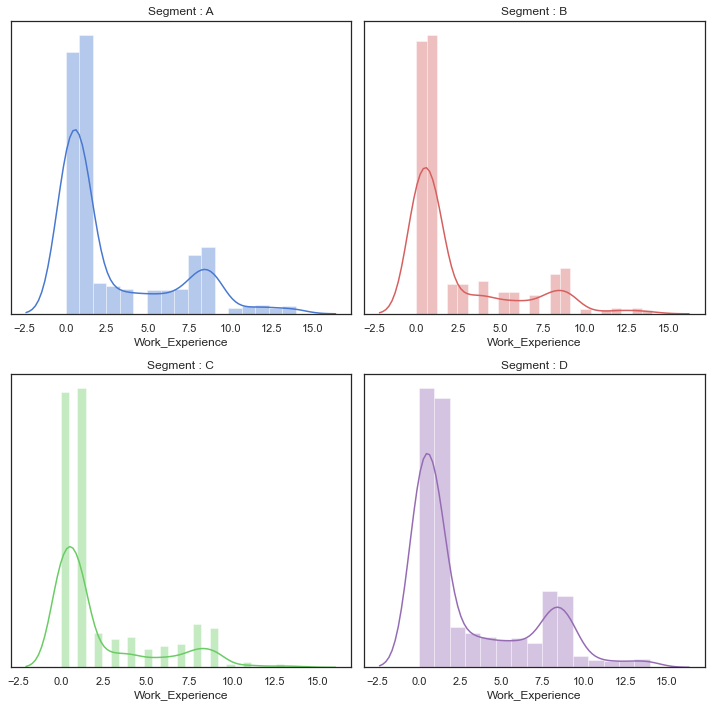

In [9]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.distplot(train[train.Segmentation =='A']["Work_Experience"],  color="b", ax=axes[0, 0]).set_title('Segment : A')

sns.distplot(train[train.Segmentation =='B']["Work_Experience"],   color="r", ax=axes[0, 1]).set_title('Segment : B')

sns.distplot(train[train.Segmentation =='C']["Work_Experience"],  color="g", ax=axes[1, 0]).set_title('Segment : C')

sns.distplot(train[train.Segmentation =='D']["Work_Experience"], color="m", ax=axes[1, 1]).set_title('Segment : D')

plt.setp(axes, yticks=[])
plt.tight_layout()

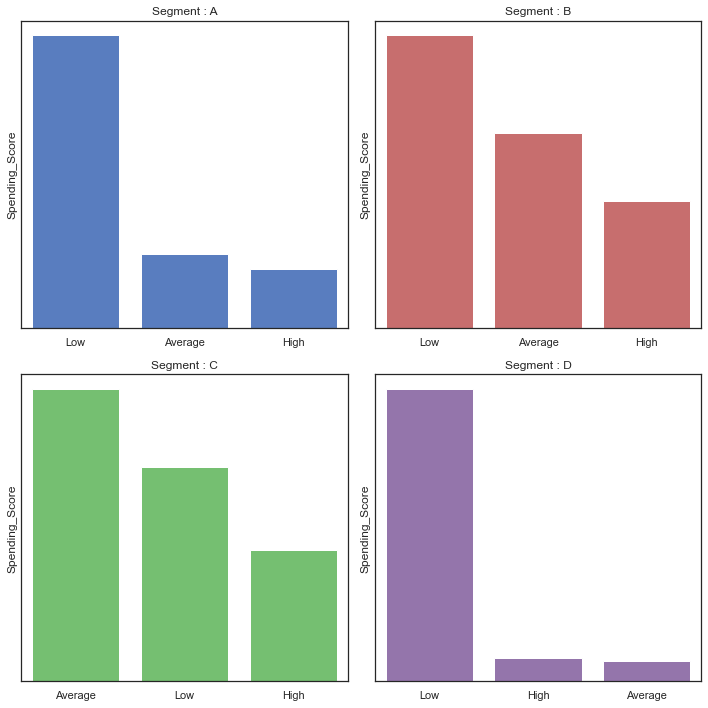

In [10]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.barplot(train[train.Segmentation =='A']["Spending_Score"].value_counts().index,train[train.Segmentation =='A']["Spending_Score"].value_counts(),  color="b", ax=axes[0, 0]).set_title('Segment : A')

sns.barplot(train[train.Segmentation =='B']["Spending_Score"].value_counts().index,train[train.Segmentation =='B']["Spending_Score"].value_counts(),   color="r", ax=axes[0, 1]).set_title('Segment : B')

sns.barplot(train[train.Segmentation =='C']["Spending_Score"].value_counts().index,train[train.Segmentation =='C']["Spending_Score"].value_counts(),  color="g", ax=axes[1, 0]).set_title('Segment : C')

sns.barplot(train[train.Segmentation =='D']["Spending_Score"].value_counts().index,train[train.Segmentation =='D']["Spending_Score"].value_counts(), color="m", ax=axes[1, 1]).set_title('Segment : D')

plt.setp(axes, yticks=[])
plt.tight_layout()


In [11]:
train.groupby('Age')['Segmentation'].describe()

,count,unique,top,freq
Age,,,,
18,132,4,D,122
19,134,4,D,120
20,127,4,D,111
21,116,4,D,102
22,142,4,D,127
23,129,4,D,113
25,218,4,D,100
26,200,4,D,109
27,229,4,D,105


In [12]:
train.groupby(['Segmentation'])["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Segmentation,,,,,,,,
A,1972.0,44.924949,16.406909,18.0,33.0,41.0,52.0,89.0
B,1858.0,48.200215,14.806443,18.0,37.0,46.0,58.0,89.0
C,1970.0,49.144162,14.575090,18.0,38.0,49.0,59.0,89.0
D,2268.0,33.390212,15.680304,18.0,22.0,29.0,38.0,89.0


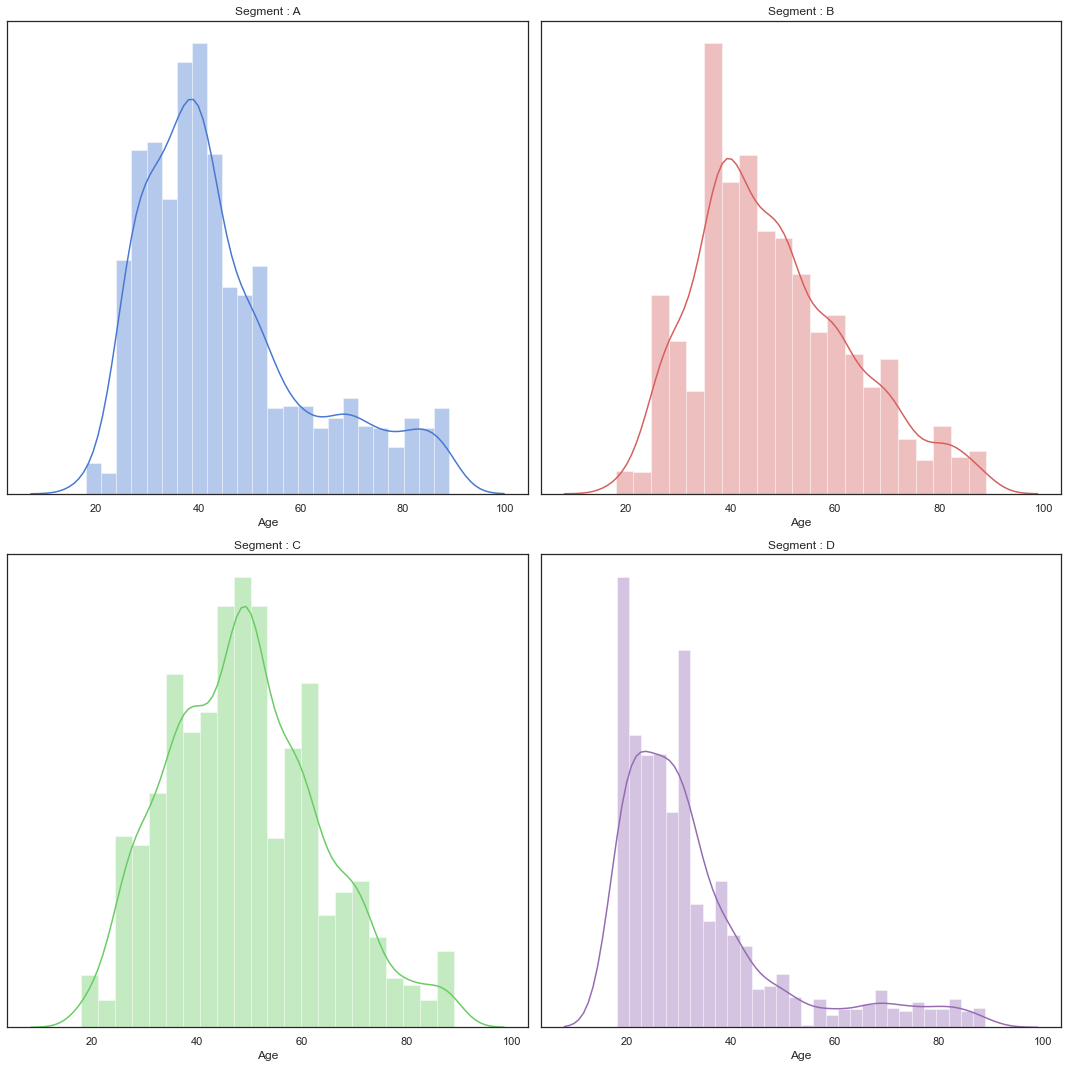

In [13]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.distplot(train[train.Segmentation =='A']["Age"],  color="b", ax=axes[0, 0]).set_title('Segment : A')

sns.distplot(train[train.Segmentation =='B']["Age"],   color="r", ax=axes[0, 1]).set_title('Segment : B')

sns.distplot(train[train.Segmentation =='C']["Age"],  color="g", ax=axes[1, 0]).set_title('Segment : C')

sns.distplot(train[train.Segmentation =='D']["Age"], color="m", ax=axes[1, 1]).set_title('Segment : D')

plt.setp(axes, yticks=[])
plt.tight_layout()

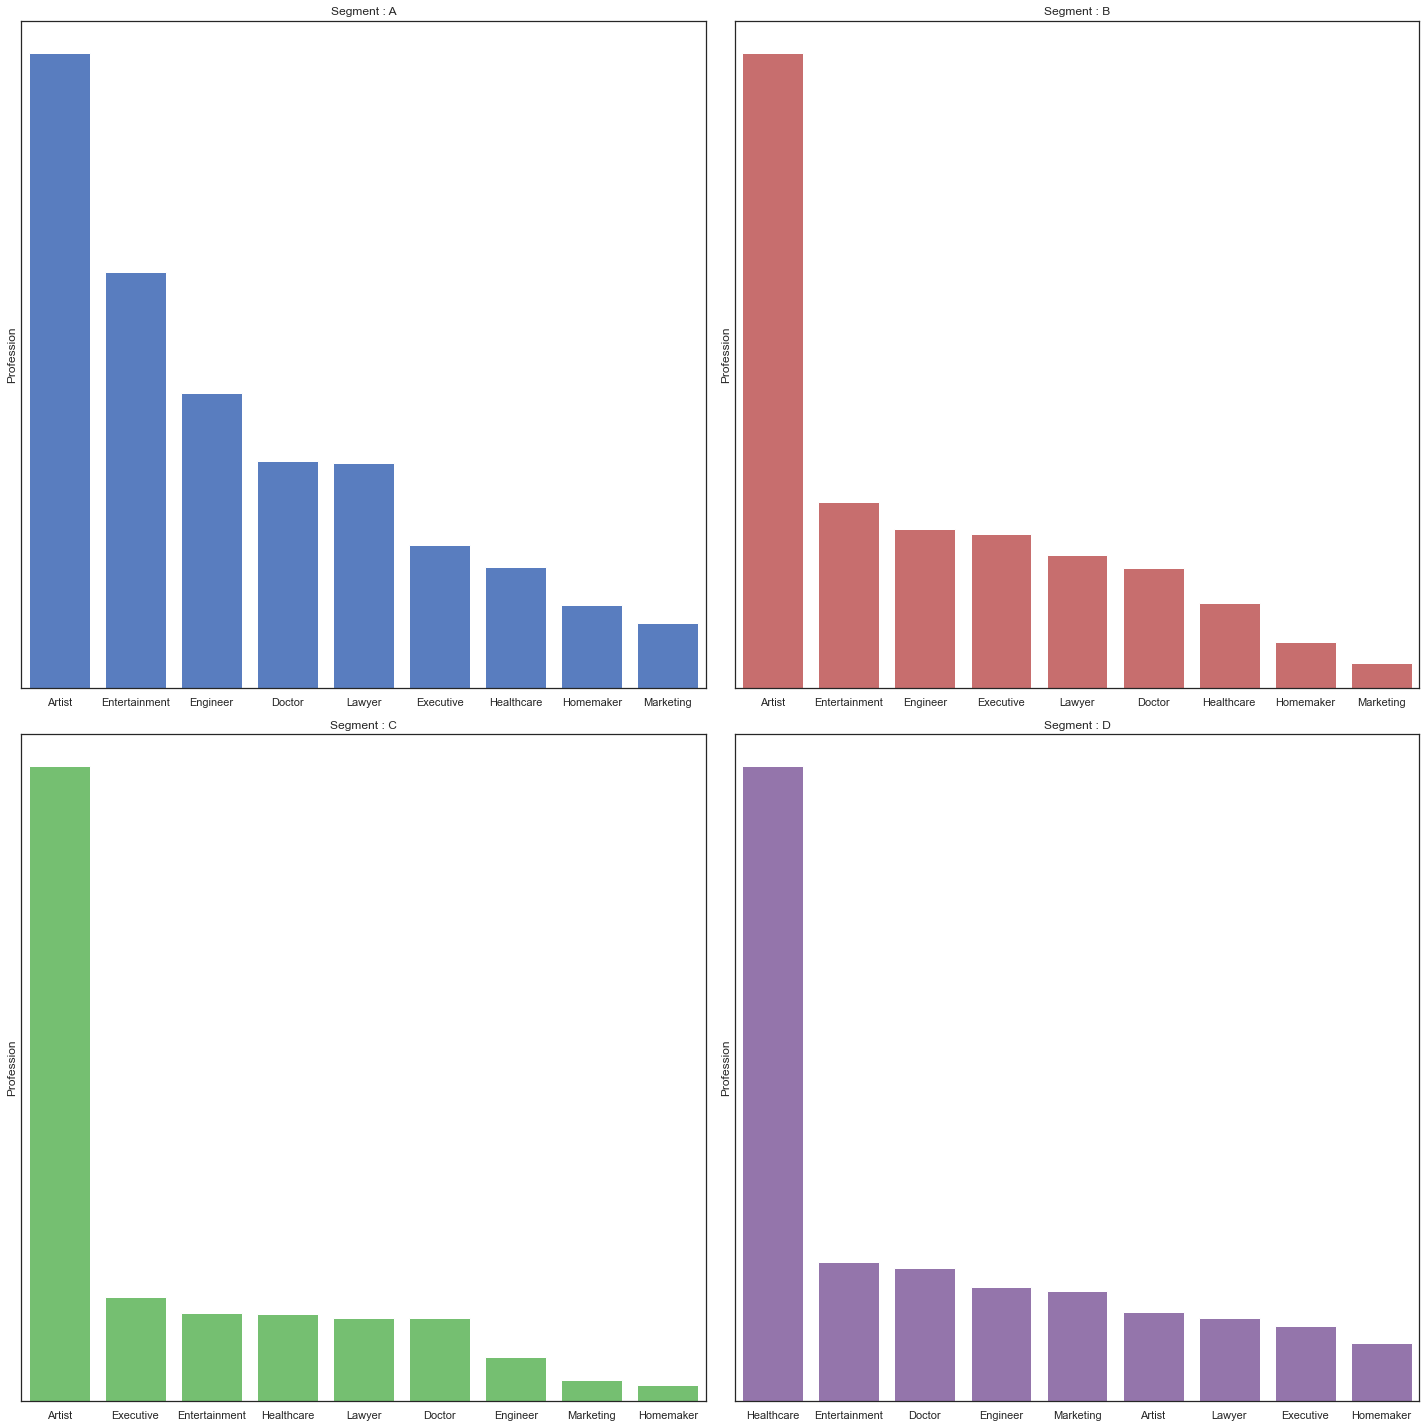

In [14]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(20, 20))

sns.barplot(train[train.Segmentation =='A']["Profession"].value_counts().index,train[train.Segmentation =='A']["Profession"].value_counts(),  color="b", ax=axes[0, 0]).set_title('Segment : A')

sns.barplot(train[train.Segmentation =='B']["Profession"].value_counts().index,train[train.Segmentation =='B']["Profession"].value_counts(),   color="r", ax=axes[0, 1]).set_title('Segment : B')

sns.barplot(train[train.Segmentation =='C']["Profession"].value_counts().index,train[train.Segmentation =='C']["Profession"].value_counts(),  color="g", ax=axes[1, 0]).set_title('Segment : C')

sns.barplot(train[train.Segmentation =='D']["Profession"].value_counts().index,train[train.Segmentation =='D']["Profession"].value_counts(), color="m", ax=axes[1, 1]).set_title('Segment : D')

plt.setp(axes, yticks=[])
plt.tight_layout()

In [15]:
train["Age"].value_counts()

35    250
37    234
33    232
42    232
27    229
40    229
43    226
32    221
38    221
28    220
25    218
31    214
36    209
39    208
41    206
26    200
30    196
29    183
50    180
47    167
51    161
46    160
45    158
53    158
52    157
49    155
48    154
22    142
19    134
18    132
23    129
20    127
21    116
56    110
55     98
59     97
60     95
61     93
57     93
62     85
63     80
58     80
65     72
66     72
70     71
68     69
69     67
72     67
67     55
73     54
71     49
81     42
82     36
89     36
83     35
88     35
79     34
84     33
75     32
86     30
74     30
77     30
78     29
87     28
76     27
80     24
85     22
Name: Age, dtype: int64

In [16]:
train['Gender'].value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

In [17]:
train['Ever_Married'].value_counts()

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

In [18]:
train['Graduated'].value_counts()

Yes    4968
No     3022
Name: Graduated, dtype: int64

In [19]:
train['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [20]:
train['Work_Experience'].value_counts()

1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64

In [21]:
train['Spending_Score'].value_counts()

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

In [22]:
train['Family_Size'].value_counts()

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

In [23]:
train['Var_1'].value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

In [24]:
print(len(train['ID'].unique()))
print(len(test['ID'].unique()))
print("Duplicate Ids: ",len(set(train['ID']).intersection(set(test['ID']))))

8068
2627
Duplicate Ids:  2332


In [25]:
from sklearn.preprocessing import LabelEncoder

# Encode features
encoder = LabelEncoder()
encode_list = train.select_dtypes(include = "object").columns
for feat in encode_list:
    train[feat] = encoder.fit_transform(train[feat].astype(str))
    if feat != 'Segmentation':
        test[feat] = encoder.transform(test[feat].astype(str))

In [26]:
train.describe()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,7239.000000,8068.000000,7733.000000,8068.000000,8068.000000
mean,463479.214551,0.547471,0.610188,43.466906,0.635102,2.885226,2.641663,1.359941,2.850123,4.166212,1.561973
std,2595.381232,0.497772,0.522109,16.711696,0.501113,2.631486,3.406763,0.848418,1.531413,1.443713,1.139029
min,458982.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,461240.750000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,1.000000
50%,463472.500000,1.000000,1.000000,40.000000,1.000000,3.000000,1.000000,2.000000,3.000000,5.000000,2.000000
75%,465744.250000,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,2.000000,4.000000,5.000000,3.000000
max,467974.000000,1.000000,2.000000,89.000000,2.000000,9.000000,14.000000,2.000000,9.000000,7.000000,3.000000


In [27]:
# I created these magic variables by going through several Kaggle kernels.
# However, none of them could help me understand why. It was hit and trial mostly until the accuracy improved. 

def create_magic_variables(df, ID_col_min_val=0):
    df['magic1'] = df['ID']%7
    df['magic2'] = df['ID']%30
    df['magic3'] = df['ID']%365
    df['magic4'] = df['ID']//7
    df['magic5'] = df['ID']//365
    df['magic6'] = df['ID']//90
    df['magic7'] = df['ID']%90
    df['magic8'] = (df['ID'].values - ID_col_min_val)
    df['magic9'] = (df['ID'].values - ID_col_min_val)//7
    df['magic10'] = (df['ID'].values - ID_col_min_val)//30
    df['magic11'] = np.sin((df['ID']-df['ID'].mean())*2*3.14/df['ID'].std())
    df['magic12'] = np.cos((df['ID']-df['ID'].mean())*2*3.14/df['ID'].std())

In [28]:
ID_col_min_val = 458982

create_magic_variables(train, ID_col_min_val)
create_magic_variables(test, ID_col_min_val)

In [29]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,magic1,magic2,magic3,magic4,magic5,magic6,magic7,magic8,magic9,magic10,magic11,magic12
0,462809,1,0,22,0,5,1.0,2,4.0,3,3,4,29,354,66115,1267,5142,29,3827,546,127,-0.998704,-0.050888
1,462643,0,1,38,1,2,NaN,0,3.0,3,0,6,13,188,66091,1267,5140,43,3661,523,122,-0.899323,-0.437285
2,466315,0,1,67,1,2,1.0,2,1.0,5,1,3,25,210,66616,1277,5181,25,7333,1047,244,0.546783,0.837275
3,461735,1,1,67,1,7,0.0,1,2.0,5,1,1,5,10,65962,1265,5130,35,2753,393,91,0.881417,-0.472339
4,462669,0,1,40,1,3,NaN,1,6.0,5,0,4,9,214,66095,1267,5140,69,3687,526,122,-0.925036,-0.379880


In [30]:
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,magic1,magic2,magic3,magic4,magic5,magic6,magic7,magic8,magic9,magic10,magic11,magic12
0,458989,0,1,36,1,2,0.0,2,1.0,5,6,19,184,65569,1257,5099,79,7,1,0,0.944672,-0.328016
1,458994,1,1,37,1,5,8.0,0,4.0,5,4,24,189,65570,1257,5099,84,12,1,0,0.940671,-0.339321
2,458996,0,1,69,0,9,0.0,2,1.0,5,6,26,191,65570,1257,5099,86,14,2,0,0.939032,-0.343830
3,459000,1,1,59,0,4,11.0,1,2.0,5,3,0,195,65571,1257,5100,0,18,2,0,0.935690,-0.352823
4,459001,0,0,19,0,8,NaN,2,4.0,5,4,1,196,65571,1257,5100,1,19,2,0,0.934841,-0.355066


In [31]:
X = train.drop(['ID', 'Segmentation'], axis=1)
y = train['Segmentation']

features = X.columns
categorical_features = list(encode_list.intersection(features))

In [32]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

In [33]:
params = {}
params['learning_rate'] = 0.03
params['max_depth'] = 24
params['n_estimators'] = 1000
params['objective'] = 'multiclass'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.8
params['random_state'] = 42
params['colsample_bytree']=0.5
# params['min_child_samples'] = 30
# params['min_data_in_leaf'] = 55
# params['reg_alpha'] = 2
# params['reg_lambda'] = 2
# params['class_weight']: {0: 0.44, 1: 0.4, 2: 0.37}
params['n_jobs'] = -1

In [34]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
acc = []

print('using KFold and multi_logloss:\n')
for fold, (trn_idx, val_idx) in enumerate(kf.split(X, y)):
    X_train = X.iloc[trn_idx]
    X_val = X.iloc[val_idx]
    y_train = y.iloc[trn_idx]
    y_val = y.iloc[val_idx]
    
    clf = LGBMClassifier(**params)
    clf.fit(X_train, y_train, 
            eval_set=[(X_val, y_val)], 
            verbose=100, 
            eval_metric='multi_logloss', 
            early_stopping_rounds=50, 
            categorical_feature=categorical_features)

    acc.append(accuracy_score(y_val, clf.predict(X_val)))
    print(f'Fold {fold}, accuracy: {acc[-1]}')
    
print(f'\nMean accuracy: {sum(acc)/5}')

using KFold and multi_logloss:

Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 1.06682
[200]	valid_0's multi_logloss: 1.03482
[300]	valid_0's multi_logloss: 1.02985
Early stopping, best iteration is:
[303]	valid_0's multi_logloss: 1.02975
Fold 0, accuracy: 0.5390334572490706
Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 1.06794
[200]	valid_0's multi_logloss: 1.03434
Early stopping, best iteration is:
[234]	valid_0's multi_logloss: 1.0315
Fold 1, accuracy: 0.5390334572490706
Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 1.07397
[200]	valid_0's multi_logloss: 1.03797
[300]	valid_0's multi_logloss: 1.03253
[400]	valid_0's multi_logloss: 1.03066
[500]	valid_0's multi_logloss: 1.03072
Early stopping, best iteration is:
[470]	valid_0's multi_logloss: 1.02961
Fold 2, accuracy: 0.5545229244114003
Training until validation scores don't improve for 50 rounds
[1

In [35]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
acc = []

print('using KFold and multi_error:\n')
for fold, (trn_idx, val_idx) in enumerate(kf.split(X, y)):
    X_train = X.iloc[trn_idx]
    X_val = X.iloc[val_idx]
    y_train = y.iloc[trn_idx]
    y_val = y.iloc[val_idx]
    
    clf = LGBMClassifier(**params)
    clf.fit(X_train, y_train, 
            eval_set=[(X_val, y_val)], 
            verbose=100, 
            eval_metric='multi_error', 
            early_stopping_rounds=50, 
            categorical_feature=categorical_features)

    acc.append(accuracy_score(y_val, clf.predict(X_val)))
    print(f'Fold {fold}, accuracy: {acc[-1]}')
    
print(f'\nMean accuracy: {sum(acc)/5}')

using KFold and multi_error:

Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_error: 0.461586	valid_0's multi_logloss: 1.06682
Early stopping, best iteration is:
[64]	valid_0's multi_error: 0.460967	valid_0's multi_logloss: 1.10781
Fold 0, accuracy: 0.5390334572490706
Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_error: 0.45601	valid_0's multi_logloss: 1.06794
Early stopping, best iteration is:
[86]	valid_0's multi_error: 0.452292	valid_0's multi_logloss: 1.08109
Fold 1, accuracy: 0.5477075588599752
Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_error: 0.447336	valid_0's multi_logloss: 1.07397
Early stopping, best iteration is:
[99]	valid_0's multi_error: 0.446097	valid_0's multi_logloss: 1.07441
Fold 2, accuracy: 0.5539033457249071
Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_error: 0.451333	valid_0's multi_logloss: 1.0626
Early stopping, be

In [36]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []

print('using StratifiedKFold and multi_logloss:\n')
for fold, (trn_idx, val_idx) in enumerate(skf.split(X, y)):
    X_train = X.iloc[trn_idx]
    X_val = X.iloc[val_idx]
    y_train = y.iloc[trn_idx]
    y_val = y.iloc[val_idx]
    
    clf = LGBMClassifier(**params)
    clf.fit(X_train, y_train, 
            eval_set=[(X_val, y_val)], 
            verbose=100, 
            eval_metric='multi_logloss', 
            early_stopping_rounds=50, 
            categorical_feature=categorical_features)

    acc.append(accuracy_score(y_val, clf.predict(X_val)))
    print(f'Fold {fold}, accuracy: {acc[-1]}')
    
print(f'\nMean accuracy: {sum(acc)/5}')

using StratifiedKFold and multi_logloss:

Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 1.07188
[200]	valid_0's multi_logloss: 1.03717
[300]	valid_0's multi_logloss: 1.0284
[400]	valid_0's multi_logloss: 1.02532
[500]	valid_0's multi_logloss: 1.02492
Early stopping, best iteration is:
[465]	valid_0's multi_logloss: 1.024
Fold 0, accuracy: 0.5421313506815365
Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 1.05778
[200]	valid_0's multi_logloss: 1.01587
[300]	valid_0's multi_logloss: 1.00433
[400]	valid_0's multi_logloss: 1.00021
[500]	valid_0's multi_logloss: 0.999908
Early stopping, best iteration is:
[479]	valid_0's multi_logloss: 0.999249
Fold 1, accuracy: 0.5625774473358116
Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 1.06592
[200]	valid_0's multi_logloss: 1.03049
[300]	valid_0's multi_logloss: 1.02246
Early stopping, best iteration is:
[323]	valid_

In [37]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []

print('using StratifiedKFold and multi_error:\n')
for fold, (trn_idx, val_idx) in enumerate(skf.split(X, y)):
    X_train = X.iloc[trn_idx]
    X_val = X.iloc[val_idx]
    y_train = y.iloc[trn_idx]
    y_val = y.iloc[val_idx]
    
    clf = LGBMClassifier(**params)
    clf.fit(X_train, y_train, 
            eval_set=[(X_val, y_val)], 
            verbose=100, 
            eval_metric='multi_error', 
            early_stopping_rounds=50, 
            categorical_feature=categorical_features)

    acc.append(accuracy_score(y_val, clf.predict(X_val)))
    print(f'Fold {fold}, accuracy: {acc[-1]}')
    
print(f'\nMean accuracy: {sum(acc)/5}')

using StratifiedKFold and multi_error:

Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_error: 0.464064	valid_0's multi_logloss: 1.07188
Early stopping, best iteration is:
[54]	valid_0's multi_error: 0.460967	valid_0's multi_logloss: 1.12955
Fold 0, accuracy: 0.5390334572490706
Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_error: 0.442999	valid_0's multi_logloss: 1.05778
[200]	valid_0's multi_error: 0.437423	valid_0's multi_logloss: 1.01587
Early stopping, best iteration is:
[181]	valid_0's multi_error: 0.432466	valid_0's multi_logloss: 1.01945
Fold 1, accuracy: 0.5675340768277571
Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_error: 0.449195	valid_0's multi_logloss: 1.06592
[200]	valid_0's multi_error: 0.439281	valid_0's multi_logloss: 1.03049
Early stopping, best iteration is:
[197]	valid_0's multi_error: 0.437423	valid_0's multi_logloss: 1.03089
Fold 2, accuracy: 0.56257744733

In [38]:
def feature_importance(model, X_train):
    feat_imp = pd.Series(model.feature_importances_, index=X_train.columns)
    feat_imp.nsmallest(30).plot(kind='barh', figsize=(8,6))

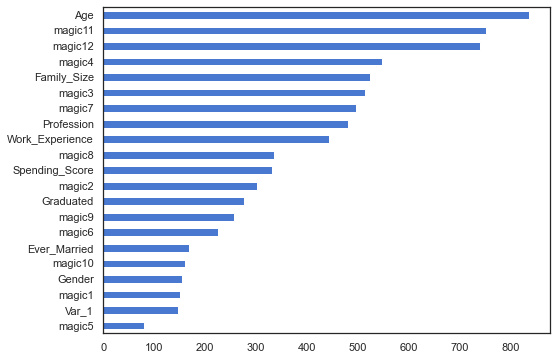

In [39]:
feature_importance(clf, X_train)

In [40]:
# Using multi_error as eval_metric (max mean accuracy)

# 181 best iteration with validation set, so selecting more for complete set
params['n_estimators'] = 200 
clf = LGBMClassifier(**params)
clf.fit(X, y, verbose=100, eval_metric='multi_error', categorical_feature=categorical_features)

LGBMClassifier(colsample_bytree=0.5, learning_rate=0.03, max_depth=24,
               n_estimators=200, objective='multiclass', random_state=42,
               subsample=0.8)

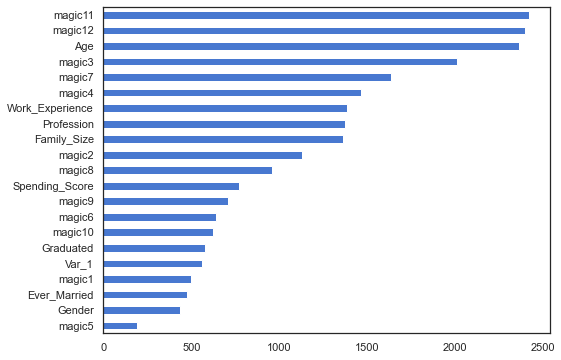

In [41]:
feature_importance(clf, X)

In [42]:
ss['Segmentation_pred'] = clf.predict(test[features])

In [43]:
ss = pd.merge(ss, train, on='ID', how='left')

In [44]:
ss.head(10)

,ID,Segmentation_x,Segmentation_pred,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation_y,magic1,magic2,magic3,magic4,magic5,magic6,magic7,magic8,magic9,magic10,magic11,magic12
0,458989,A,0,0.0,1.0,42.0,1.0,2.0,1.0,2.0,1.0,5.0,1.0,6.0,19.0,184.0,65569.0,1257.0,5099.0,79.0,7.0,1.0,0.0,0.991474,-0.130307
1,458994,A,2,1.0,1.0,38.0,1.0,5.0,8.0,0.0,4.0,5.0,2.0,4.0,24.0,189.0,65570.0,1257.0,5099.0,84.0,12.0,1.0,0.0,0.989825,-0.142292
2,458996,A,0,0.0,1.0,71.0,0.0,9.0,1.0,2.0,1.0,5.0,0.0,6.0,26.0,191.0,65570.0,1257.0,5099.0,86.0,14.0,2.0,0.0,0.989125,-0.147080
3,459000,A,2,1.0,1.0,58.0,0.0,4.0,12.0,1.0,2.0,5.0,2.0,3.0,0.0,195.0,65571.0,1257.0,5100.0,0.0,18.0,2.0,0.0,0.987655,-0.156647
4,459001,A,3,0.0,0.0,20.0,0.0,8.0,NaN,2.0,4.0,5.0,2.0,4.0,1.0,196.0,65571.0,1257.0,5100.0,1.0,19.0,2.0,0.0,0.987273,-0.159036
5,459003,A,1,1.0,1.0,51.0,1.0,1.0,0.0,1.0,5.0,3.0,2.0,6.0,3.0,198.0,65571.0,1257.0,5100.0,3.0,21.0,3.0,0.0,0.986492,-0.163812
6,459005,A,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,459008,A,2,0.0,1.0,52.0,1.0,0.0,1.0,0.0,3.0,5.0,1.0,4.0,8.0,203.0,65572.0,1257.0,5100.0,8.0,26.0,3.0,0.0,0.984438,-0.175735
8,459013,A,2,1.0,1.0,47.0,1.0,0.0,3.0,0.0,4.0,5.0,2.0,2.0,13.0,208.0,65573.0,1257.0,5100.0,13.0,31.0,4.0,1.0,0.982239,-0.187632
9,459014,A,3,1.0,0.0,22.0,0.0,5.0,0.0,2.0,4.0,5.0,3.0,3.0,14.0,209.0,65573.0,1257.0,5100.0,14.0,32.0,4.0,1.0,0.981783,-0.190008


In [45]:
ss['Segmentation'] = ss.fillna(-1).apply(lambda x: x['Segmentation_y'] if x['Segmentation_y'] != -1 else x['Segmentation_pred'], axis=1)
ss['Segmentation'] = ss['Segmentation'].astype(int).map({0: 'A', 1: 'B', 2: 'C', 3: 'D'})

In [46]:
ss[['ID', 'Segmentation']].to_csv('solution.csv', index=False)